<a href="https://colab.research.google.com/github/omkmorendha/COVID-19-Image-Detection/blob/main/Final_DAH_one_layer_task_one.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Set Path

In [ ]:
dataset_path = "/content/drive/MyDrive/Covid19-dataset"
train_path = dataset_path + "/train/"
test_path = dataset_path + "/test/"

Import libraries

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.image as mpimg
import cv2
import pathlib
import random
from sklearn.model_selection import train_test_split

Load Dataset

In [ ]:
label_dict = {"Normal" : [1, 0, 0], "Viral Pneumonia" : [0, 1, 0], "Covid" : [0, 0, 1]}
class_name = ["Normal", "Viral Pneumonia", "Covid"]

In [ ]:
X_train = []
y_train = []

for cls in class_name:
  for fname in os.listdir(train_path + "/" + cls + "/"):
    print(cls, fname)
    img_path = train_path + "/" + cls + "/" + fname
    img = cv2.imread(img_path)
    img = cv2.resize(img, (200, 200))

    X_train.append(img)
    y_train.append(label_dict[cls])

Normal 017.jpeg
Normal 010.jpeg
Normal 015.jpeg
Normal 019.jpeg
Normal 013.jpeg
Normal 018.jpeg
Normal 016.jpeg
Normal 014.jpeg
Normal 011.jpeg
Normal 01.jpeg
Normal 012.jpeg
Normal 04.jpeg
Normal 052.jpeg
Normal 053.jpeg
Normal 03.jpeg
Normal 056.jpeg
Normal 057.jpeg
Normal 023.jpeg
Normal 058.jpeg
Normal 05.jpeg
Normal 055.jpeg
Normal 051.jpeg
Normal 054.jpeg
Normal 02.jpeg
Normal 024.jpeg
Normal 050.jpeg
Normal 025.jpeg
Normal 020.jpeg
Normal 022.jpeg
Normal 021.jpeg
Normal 061.jpeg
Normal 080.jpeg
Normal 072.jpeg
Normal 066.jpeg
Normal 077.jpeg
Normal 06.jpeg
Normal 067.jpeg
Normal 068.jpeg
Normal 069.jpeg
Normal 08.jpeg
Normal 076.jpeg
Normal 075.jpeg
Normal 060.jpeg
Normal 079.jpeg
Normal 074.jpeg
Normal 065.jpeg
Normal 070.jpeg
Normal 063.jpeg
Normal 062.jpeg
Normal 071.jpeg
Normal 081.jpeg
Normal 064.jpeg
Normal 059.jpeg
Normal 073.jpeg
Normal 07.jpeg
Normal 082.jpeg
Normal 086.jpeg
Normal 083.jpeg
Normal 092.jpeg
Normal 085.jpeg
Normal 088.jpeg
Normal 094.jpeg
Normal 087.jpeg


In [ ]:
X_test = []
y_test = []

for cls in class_name:
  for fname in os.listdir(test_path + "/" + cls + "/"):
    print(cls, fname)
    img_path = test_path + "/" + cls + "/" + fname
    img = cv2.imread(img_path)
    img = cv2.resize(img, (200, 200))

    X_test.append(img)
    y_test.append(label_dict[cls])

Normal 0116.jpeg
Normal 0109.jpeg
Normal 0112.jpeg
Normal 0111.jpeg
Normal 0102.jpeg
Normal 0106.jpeg
Normal 0101.jpeg
Normal 0105.jpeg
Normal 0114.jpeg
Normal 0110.jpeg
Normal 0107.jpeg
Normal 0115.jpeg
Normal 0103.jpeg
Normal 0108.jpeg
Normal 0117.jpeg
Normal 0118.jpeg
Normal 0120.jpeg
Normal 0119.jpeg
Normal 0121.jpeg
Normal 0122.jpeg
Viral Pneumonia 0105.jpeg
Viral Pneumonia 0111.jpeg
Viral Pneumonia 0110.jpeg
Viral Pneumonia 0107.jpeg
Viral Pneumonia 0113.jpeg
Viral Pneumonia 0119.jpeg
Viral Pneumonia 0103.jpeg
Viral Pneumonia 0109.jpeg
Viral Pneumonia 0114.jpeg
Viral Pneumonia 0106.jpeg
Viral Pneumonia 0120.jpeg
Viral Pneumonia 0115.jpeg
Viral Pneumonia 0116.jpeg
Viral Pneumonia 0108.jpeg
Viral Pneumonia 0118.jpeg
Viral Pneumonia 0102.jpeg
Viral Pneumonia 0104.jpeg
Viral Pneumonia 0101.jpeg
Viral Pneumonia 0117.jpeg
Viral Pneumonia 0112.jpeg
Covid 0100.jpeg
Covid COVID-00012.jpg
Covid COVID-00022.jpg
Covid 0115.jpeg
Covid 0105.png
Covid 0108.jpeg
Covid 0118.jpeg
Covid 096.png
Cov

Normalise image values

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
X_gray_eq = []

for image in X_train:
    # Convert the image to grayscale if it's in color
    image_f = np.float32(image)
    gray_image = cv2.cvtColor(image_f, cv2.COLOR_BGR2GRAY)

    # Perform histogram equalization
    #equalized_image = cv2.equalizeHist(gray_image)

    # Append the equalized image to the result array
    X_gray_eq.append(gray_image)

X_train = np.array(X_gray_eq)

X_gray_eq = []

for image in X_test:
    # Convert the image to grayscale if it's in color
    image_f = np.float32(image)
    gray_image = cv2.cvtColor(image_f, cv2.COLOR_BGR2GRAY)

    # Perform histogram equalization
    #equalized_image = cv2.equalizeHist(gray_image)

    # Append the equalized image to the result array
    X_gray_eq.append(gray_image)

X_test = np.array(X_gray_eq)

## Model 1

In [ ]:
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout, Flatten, Conv2D
from keras.layers import Input, Add, Dense, BatchNormalization, Flatten, Conv2D, MaxPooling2D
from keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps
model.add(Flatten())

# Fully connected layers
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer to reduce overfitting

model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.5))

model.add(Dense(3, activation='softmax'))
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 198, 198, 32)      320       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 99, 99, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 23, 23, 128)      

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

e = 25
b = 25

history = model.fit(
    X_train,  # Your training data
    y_train,  # Your training labels
    epochs=e,
    batch_size=b,
    validation_split=0.2,  # Specify the fraction of training data to use for validation
    callbacks=[early_stopping]
)

Epoch 1/25
8/8 [==============================] - 20s 2s/step - loss: 0.6724 - accuracy: 0.3600 - val_loss: 0.7169 - val_accuracy: 0.0000e+00
Epoch 2/25
8/8 [==============================] - 20s 2s/step - loss: 0.6457 - accuracy: 0.3500 - val_loss: 0.6799 - val_accuracy: 0.0000e+00
Epoch 3/25
8/8 [==============================] - 18s 2s/step - loss: 0.6307 - accuracy: 0.3500 - val_loss: 0.6812 - val_accuracy: 0.0000e+00
Epoch 4/25
8/8 [==============================] - 18s 2s/step - loss: 0.6254 - accuracy: 0.3550 - val_loss: 0.7087 - val_accuracy: 0.0000e+00
Epoch 5/25
8/8 [==============================] - 19s 2s/step - loss: 0.6199 - accuracy: 0.3650 - val_loss: 0.7084 - val_accuracy: 0.0000e+00
Epoch 6/25
8/8 [==============================] - 19s 2s/step - loss: 0.5983 - accuracy: 0.4750 - val_loss: 0.7136 - val_accuracy: 0.0000e+00
Epoch 7/25
8/8 [==============================] - 18s 2s/step - loss: 0.5909 - accuracy: 0.4650 - val_loss: 0.6511 - val_accuracy: 0.0392
Epoch 8/25

In [ ]:
y_preds = model.predict(X_test)

3/3 [==============================] - 2s 366ms/step


In [ ]:
y_preds

array([[3.59133303e-01, 6.36780560e-01, 4.08607023e-03],
       [3.75732854e-02, 9.62422967e-01, 3.61518778e-06],
       [6.68206513e-01, 3.31707120e-01, 8.62909437e-05],
       [5.21480746e-04, 9.99478161e-01, 2.67124562e-07],
       [9.97054577e-01, 2.74142670e-03, 2.03959498e-04],
       [9.91676331e-01, 8.21027253e-03, 1.13330992e-04],
       [6.72803283e-01, 3.26610297e-01, 5.86430833e-04],
       [7.65234590e-01, 2.34224081e-01, 5.41286659e-04],
       [2.15380132e-01, 7.84613073e-01, 6.72784699e-06],
       [7.29171276e-01, 2.70822406e-01, 6.31932471e-06],
       [8.70800577e-04, 9.99128938e-01, 2.83021933e-07],
       [8.49104047e-01, 1.50867835e-01, 2.80996956e-05],
       [9.17593777e-01, 8.22570249e-02, 1.49110841e-04],
       [6.25061333e-01, 3.74846667e-01, 9.19879094e-05],
       [9.93782163e-01, 6.18472556e-03, 3.30855146e-05],
       [9.08115685e-01, 9.18641090e-02, 2.00437917e-05],
       [9.95113432e-01, 4.81530884e-03, 7.12336769e-05],
       [8.48542392e-01, 1.51440

In [ ]:
y_pred_class = []
for pred in y_preds.tolist():
  if pred[0] >= pred[1] and pred[0] >= pred[2]:
    y_pred_class.append(0)
  elif pred[1] >= pred[0] and pred[1] >= pred[2]:
    y_pred_class.append(1)
  else:
    y_pred_class.append(2)

y_pred_class = np.array(y_pred_class)
print(y_pred_class.shape, y_test.shape)

(66,) (66, 3)


In [ ]:
y_actual = []

for l in y_test.tolist():
  if l == [1, 0, 0]:
    y_actual.append(0)
  elif l == [0, 1, 0]:
    y_actual.append(1)
  else:
    y_actual.append(2)

y_actual = np.array(y_actual)
y_actual

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
y_pred_class

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

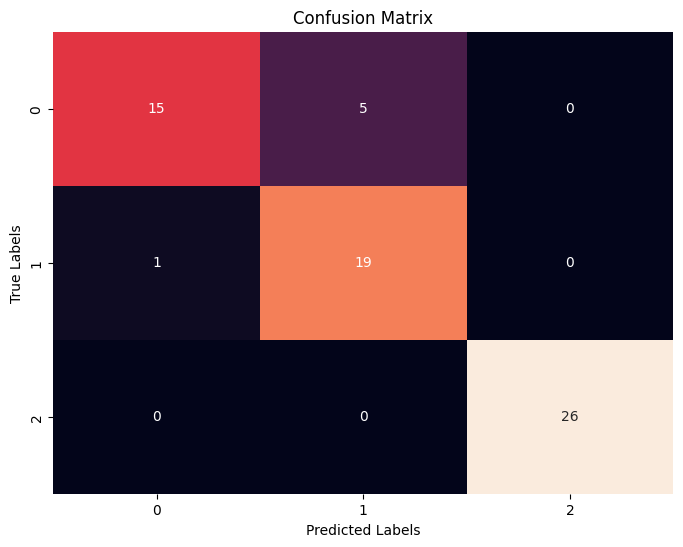

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_actual, y_pred_class)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

target_names = ["Normal", "Viral Pneumonia", "COVID-19"]
print(classification_report(y_actual, y_pred_class, target_names=target_names))

                 precision    recall  f1-score   support

         Normal       0.94      0.75      0.83        20
Viral Pneumonia       0.79      0.95      0.86        20
       COVID-19       1.00      1.00      1.00        26

       accuracy                           0.91        66
      macro avg       0.91      0.90      0.90        66
   weighted avg       0.92      0.91      0.91        66



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_actual, y_pred_class)

0.9090909090909091